In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression case study: classify credit card defaults

__dataset:__ UC Irvine Machine Learning Repository

   - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
   - a dataset of customers defaulting on their next credit card payment
    
__modeling exercise__

   - can we use machine learning to predict whether a customer will default on their next credit card payment, based on the features in this dataset?
   - since defaults have been encoded as a binary response variable (0 or 1) this is a _classification_ problem

__download and prepare the dataset for working on it with python__

    1. download the data
        - follow the link and click Download: Data Folder
    
    2. move the data to the data/ directory in this directory 
        - try it with your linux shell
            - list your Downloads folder
            - We see the filename is full of spaces, let's clean that up and move the file in one line
            - open the .xls file
                - .xls files are not ASCII readable (can't read it with Pandas or a text editor)
                - all the data is in the first sheet, so export it as a .csv
                    - in Excel: SaveAs --> .csv

~~~
linux:
$ ls ~/Downloads
default of credit card clients.xls

/ move the file from ~/Downloads/ to data/ AND rename it
$ mv ~/Downloads/default\ of\ credit\ card\ clients.xls data/cred_card_defaults.xls

/ check the data/ folder after exporting .xls as .csv
$ ls data
cred_card_defaults.csv	cred_card_defaults.xls
~~~
    



### The data:
  - This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
  - X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
  - X2: Gender (1 = male; 2 = female).
  - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
  - X4: Marital status (1 = married; 2 = single; 3 = others).
  - X5: Age (year).
  - X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
  - X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
  - X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Read in the dataset with pandas
   - what does header=1 do?

In [18]:
datafile = 'data/cred_card_defaults.csv'
data = pd.read_csv(datafile, header=1) 
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Explore the data

In [3]:
# look at datatypes and missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
# look at data ranges
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### our response variable has a long column name, lets rename it
   - I can use the DataFrame.rename() method and pass a dict with {old_name:new_name}
   - what is the argument 'axis=1' doing?
   - what is the argument 'inplace=True' doing?

In [5]:

data.rename({'default payment next month':'default'}, axis=1, inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Inspect the data visually and look for patterns

pairplots are sweet but this is not very useful with so many features...

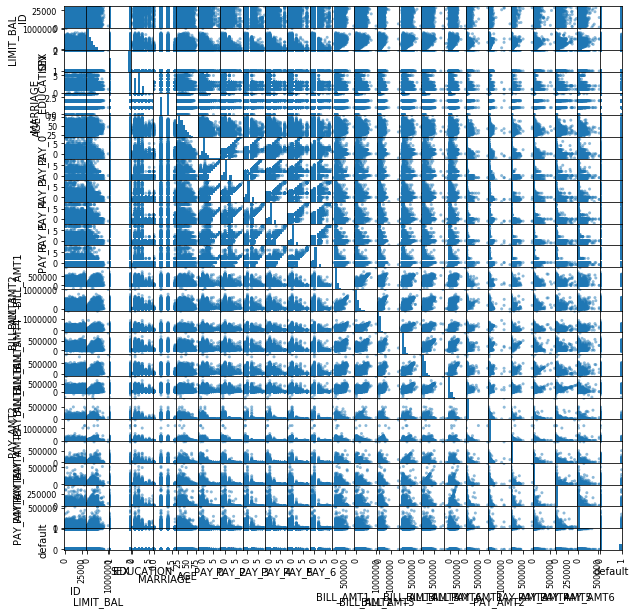

In [11]:
# sns.pairplot(data) # takes forever
pd.plotting.scatter_matrix(data, figsize=(10,10)); 

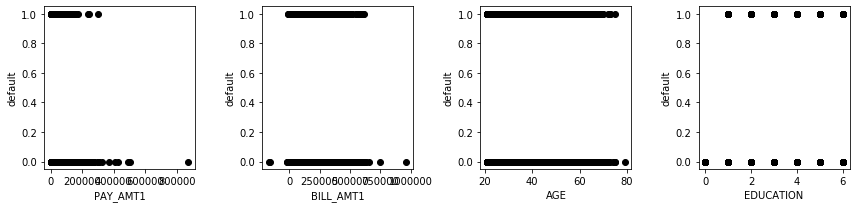

In [16]:
fig, ax = plt.subplots(1,4,figsize=(12,3))
for i, pairs in enumerate([('default','PAY_AMT1'), ('default','BILL_AMT1'), ('default','AGE'),('default','EDUCATION')]):
    xcol = pairs[1]
    ycol = pairs[0]
    ax[i].plot(data[xcol], data[ycol], 'ok')
    ax[i].set_xlabel(xcol)
    ax[i].set_ylabel(ycol)
plt.tight_layout()

It's really hard to see any patterns with our eye, and there are a LOT of features. Thus, this problem is a great candidate for machine learning, since ML models have the potential to find patterns that are hard for the human brain to recognize. Let's see how a logistic regression performs in learning payment default behavior from these quantitative features. 

### import some useful linear modeling libraries

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

### define some functions we'll use later

In [8]:
def confusion_matrix_dataframe(y_true, y_pred):
    cnf_arr = confusion_matrix(y_true, y_pred)
    cnf = pd.DataFrame(cnf_arr)
    cnf.columns = ['pred0','pred1']
    cnf.index = ['true0','true1']
    return cnf

def plot_class_balance(df, targ_col):
    data_0 = df.loc[df[targ_col] == 0].copy()
    data_1 = df.loc[df[targ_col] == 1].copy()
    n_0 = data_0.shape[0]
    n_1 = data_1.shape[0]
    plt.bar([0,1],[n_0, n_1])
    plt.xticks([0,1])
    plt.title('class representation in the dataset');

### Separate the dataset into features and a target
   - helps to look at the column names
   - you can copy and paste from this list
   - we can slice the DataFrame with 2 lists of columns: one for features, on for target
   - think critically about which columns are legit features
       - do you think the feature can be predictive?
       - e.g. should ID be a feature?

In [9]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [10]:
feat_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
targ_col = 'default'

X = data[feat_cols].values
y = data[targ_col].values

# check the shapes. Do these make sense?
print(f'feature matrix shape: {X.shape}')
print(f'target vector shape: {y.shape}')

feature matrix shape: (30000, 23)
target vector shape: (30000,)


### randomly split the dataset into train and test sets

In [11]:
test_pcnt = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pcnt, random_state=10)

### fit a logistic regression model to the training data

In [12]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# make predictions
preds = logistic.predict(X_test)

/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
# take a peek to see what the true values and predictions look like
print('true: predicted')
[print(x) for x in zip(y_test[:10], preds[:10])]

true: predicted
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


[None, None, None, None, None, None, None, None, None, None]

## assess the model's accuracy

In [14]:
acc = accuracy_score(y_test, preds)
print(f'accuracy = {round(acc, 3)}')

accuracy = 0.78


__GREAT!__ accuracy = 78%, that seems pretty good, I must be a clever data scientist. So I can send the model to my project manager, right?

Not so fast there, ranger. 

Let's assess this model with some other scoring methods just for s's and g's

In [15]:
# score with a few methods
acc = accuracy_score(y_test, preds)
rec = recall_score(y_test, preds)
prec = precision_score(y_test, preds)

for label, score in zip(['accuracy','recall','precision'],[acc, rec, prec]):
    print(f'{label}, {round(score,3)}')

accuracy, 0.78
recall, 0.0
precision, 0.0


__what's going on?__ Those precision and recall scores are _terrible_

__remember__ how these scores are defined: they come from the _confusion matrix_
 - accuracy: how many times did we guess right?
     - (TP + TN) / (TP + FP + TN + FN)
 - precision: of the times we guessed 1, how many times were we right?
     - TP / (TP + FP)
 - recall: of all the true 1's out there, how many did we catch?
     - TP / (TP + FN)
     
__confusion matrix__:

|   |pred 0 |pred 1|
|---|---|---|
|__true 0__|TN |FP |
|__true 1__|FN |TP |

In [16]:
confusion_matrix_dataframe(y_test, preds)

,pred0,pred1
true0,4682,1
true1,1317,0


__check__ how many times the model predicted 0 or 1

In [17]:
print(f'{len(y_test)} observations in the test set')
print(f'test set contains {sum(y_test)} instances of "1"')
print(f'the model predicted "1" {sum(preds)} times')


6000 observations in the test set
test set contains 1317 instances of "1"
the model predicted "1" 1 times


__wierd...__ the model predicted "0" every time except once. Maybe we should look at the distribution of "0" and "1" in the dataset

30000 observations in the dataset
23364 observations of "0" in the dataset
6636 observations of "1" in the dataset
observations of "1" makes up 22.12% of the dataset


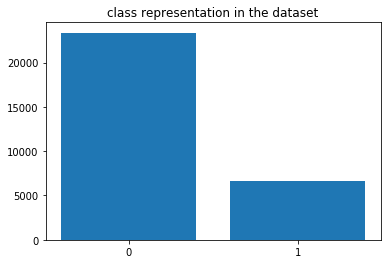

In [18]:
n = data.shape[0]
data_0 = data.loc[data.default == 0].copy()
data_1 = data.loc[data.default == 1].copy()
n_0 = data_0.shape[0]
n_1 = data_1.shape[0]
print(f'{n} observations in the dataset')
print(f'{n_0} observations of "0" in the dataset')
print(f'{n_1} observations of "1" in the dataset')
print(f'observations of "1" makes up {n_1/n * 100}% of the dataset')

plot_class_balance(data, 'default')

## imbalanced classes in classification problems
   - the positive class is only represented in 22% of the dataset
   - the model 'learns' to maximize its accuracy
   - in this case, it just learned to guess "0" every time and it's right 77% of the time
   - but is that __useful?__
   
Remember, machine learning algorithms aren't magic. They will use math to optimize their objective function (here, essentially it will find coefficients to acheive the highest accuracy). 

Let's say the government wants a __'Batman finder'__ app. Stark Industries invests 2 Billion Dollars in analyzing Batman's alleged movements and perceived thought patterns to try to locate him. I also bid for the project, and I just make a Wordpress Template that says 'Batman not here' every time (I'll sell it to them for 1 Billion Dollars... hahaha). The thing is, in most cities, most of the time, my app will be 100% accurate. 

This is just a silly example to illustrate that for low-probability outcomes in classification problems, you can't just plug and play. As a data scientist, you actually need to think critcally about what you expect the model to learn with the data you've given it. If I give the model a dataset with only 22% of the values labeled "1" and tell it to solve for the best accuracy, it can be right something like 78% of the time by just guessing "0" every time.
   
what we've got here is a classic _class imbalance_ problem
   - in order to get the model to learn the patterns that produce the positive class, we need to balance the classes

### Dealing with imbalanced classes: some methods

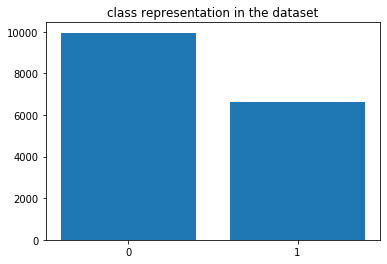

In [19]:
## simple solution: just remove examples of the 0 class
data_0 = data.loc[data.default == 0].copy()
data_1 = data.loc[data.default == 1].copy()

# n to reach 2/3 : 1/3 balance
n_targ = int(n_1* 1.5)

idx = np.random.choice(n_0, size=n_targ)
data_0_undersamp = data_0.iloc[idx, :].copy()
data_0_undersamp.reset_index(inplace=True)
data_0_undersamp.drop('index', axis=1, inplace=True)

# concat them together
data_bal = pd.concat([data_0_undersamp, data_1])

# plot
plot_class_balance(data_bal, 'default')

## train a model on the balanced dataset

In [53]:
# feature and target 
X = data_bal[feat_cols]
y = data_bal[targ_col]

# train test split 
test_pcnt = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pcnt, random_state=13)

# train model 
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# make predictions
preds = logistic.predict(X_test)

/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
# score with a few methods
acc = accuracy_score(y_test, preds)
rec = recall_score(y_test, preds)
prec = precision_score(y_test, preds)

for label, score in zip(['accuracy','recall','precision'],[acc, rec, prec]):
    print(f'{label}, {round(score,3)}')

accuracy, 0.604
recall, 0.034
precision, 0.726


In [55]:
# how many times did the model guess 1?
print(f'{len(y_test)} observations in the test set')
print(f'test set contains {sum(y_test)} instances of "1"')
print(f'the model predicted "1" {sum(preds)} times')

3318 observations in the test set
test set contains 1341 instances of "1"
the model predicted "1" 62 times


In [56]:
confusion_matrix_dataframe(y_test, preds)

,pred0,pred1
true0,1960,17
true1,1296,45


In [57]:
## tune the predictions yourself 


In [58]:
probs = logistic.predict_proba(X_test) # returns the raw predicted probabilities as nx2 array: [prob0, prob1]
prob_1 = probs[:,1] # grab the probabilities of the class being 1
prob_1 = [round(x,3) for x in prob_1] # round off some decimals so they are easy to look at
print('true, predicted')
[print(x) for x in zip(prob_1[:10], preds[:10])];

true, predicted
(0.397, 0)
(0.316, 0)
(0.48, 0)
(0.483, 0)
(0.426, 0)
(0.445, 0)
(0.452, 0)
(0.245, 0)
(0.304, 0)
(0.301, 0)


__probability thresholds__
  - By looking at the predicted probabilities and the predictions together, you can see that the model will label a prediction as "1" if the predicted probability is >= 0.5
  - the default threshold = 0.5
  - we don't have to accept the default; we can apply our own threshold
  
__function to apply a custom threshold:__

In [60]:
def map_predictions(probs, threshold=0.5):
    """ 
    param:
    probs       np.array, predicted probabilities
    threshold   float [0,1]
    
    return:
    list of probabilites mapped to 0 or 1
    """
    f = lambda x: 1 if x >= threshold else 0
    mapped = map(f, probs)
    
    return [x for x in mapped]

pred_v2 = map_predictions(prob_1, threshold=0.4)

print('true, predicted, pred_v2')
[print(x) for x in zip(prob_1[:10], preds[:10], pred_v2[:10])];

true, predicted, pred_v2
(0.397, 0, 0)
(0.316, 0, 0)
(0.48, 0, 1)
(0.483, 0, 1)
(0.426, 0, 1)
(0.445, 0, 1)
(0.452, 0, 1)
(0.245, 0, 0)
(0.304, 0, 0)
(0.301, 0, 0)


If we lower the threshold for labeling "1" from 0.5 to 0.4, we get more predictions of "1". let's see how that affects the accuracy, precision, and recall scores.

In [61]:
# score with a few methods
acc = accuracy_score(y_test, pred_v2)
rec = recall_score(y_test, pred_v2)
prec = precision_score(y_test, pred_v2)

for label, score in zip(['accuracy','recall','precision'],[acc, rec, prec]):
    print(f'{label}, {round(score,3)}')

accuracy, 0.589
recall, 0.717
precision, 0.494


|threshold | 0.5 | 0.4 |
|---|---|---|
|accuracy|0.604 |0.589|
|recall|0.034|0.717|
|precision|0.726|0.494|

__the precision/recall tradeoff__
  - By lowering the theshold for predicting "1", we predict "1" many more times.
  - Thus, we catch more of the real "1"s out there (fewer False Negatives).
  - But we also probably predict "1" more when the actual is "0" (more False Positives)
  
__result__: higher recall, lower precision, some loss of accuracy

What's the right threshold to pick? Depends on your problem. In this case, how important are precision vs recall in terms of credit card default risk?

__high-recall model:__ catch as many potential credit defaulters as you can, knowning you will label some who wouldn't have defaulted

__high-precision model:__ be very sure that when you label someone as a default risk, they are, knowning you will miss some default risks

This is an example of the kind of model tuning you'll do as a data scientist, and there are many more methods available to assess and tune models.

